In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load specific column
df = pd.read_csv('/content/HR_Analytics.csv', usecols = ['EmpID', 'Age', 'AgeGroup', 'Gender', 'MaritalStatus', 'Over18', 'EducationField',
                                                        'JobRole', 'Department', 'JobLevel', 'OverTime', 'BusinessTravel', 'TotalWorkingYears',
                                                         'MonthlyIncome', 'PercentSalaryHike', 'DistanceFromHome', 'EnvironmentSatisfaction',
                                                         'JobSatisfaction', 'PerformanceRating', 'YearsAtCompany', 'YearsInCurrentRole',
                                                          'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'])

In [ ]:
df.shape

(1480, 24)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,Over18,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,Research & Development,3,Life Sciences,3,Male,1,Laboratory Technician,3,Single,1420,Y,No,13,3,0,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,Sales,10,Medical,4,Female,1,Sales Representative,3,Single,1200,Y,No,12,3,0,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,Sales,5,Marketing,2,Male,1,Sales Representative,2,Single,1878,Y,Yes,14,3,0,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,Research & Development,5,Life Sciences,2,Male,1,Research Scientist,4,Single,1051,Y,No,15,3,0,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,Research & Development,8,Medical,3,Male,1,Laboratory Technician,3,Single,1904,Y,No,12,3,0,0,0,0,0.0


In [ ]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction',
       'Gender', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Summary & Description for the data

### Summary:
This is a dataset about almost 1500 employees. They works in different departments with different job roles. There are 60% male employee and 40% female employee. Most of them are married. However, around 16% of them have left their job.

### Column Descriptions:
- `EmpID`: Employee ID of each employee.
- `Age`: Age of each employee.
- `AgeGroup`: Age group.
- `Attrition`: Whether the employee left his/her job or not.
- `BusinessTravel`: Describe the employee's business travel frequency.
- `Department`: Which department the employee currently working.
- `DistanceFromHome`: Distance of office from home.
- `EducationField`: Employee's education field.
- `EnvironmentSatisfaction`: Satisfaction level on employee's work environment.
- `Gender`: Gender of employees.
- `JobLevel`: Employee's job level in their office.
- `JobRole`: Role of employee's.
- `JobSatisfaction`: Job satisfaction level of employees.
- `MaritalStatus`: Marital status of employees.
- `MonthlyIncome`: Employee's income per month.
- `Over18`: Indicate the specific employee is 18+ or not.
- `OverTime`: Whether the employee do overtime or not.
- `PercentSalaryHike`: Salary hike in percentage.
- `PerformanceRating`: Rating on employee's performance.
- `TotalWorkingYears`: Total working year of employees.
- `YearsAtCompany`: Working year at current company.
- `YearsInCurrentRole`: Working year at current role.
- `YearsSinceLastPromotion`: Number of year since the last promotion.
- `YearsWithCurrManager`: Number of year with current manager.

# Data Assessing

- There are 7 duplicate rows. `Validity issue`
- Data missing for 57 employees in "YearsWithCurrManager" column. `Completeness issue`
- "BusinessTravel" column sometimes contains Travel_Rarely, sometimes contains TravelRarely. `Consistency issue`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    1480 non-null   object 
 1   Age                      1480 non-null   int64  
 2   AgeGroup                 1480 non-null   object 
 3   Attrition                1480 non-null   object 
 4   BusinessTravel           1480 non-null   object 
 5   Department               1480 non-null   object 
 6   DistanceFromHome         1480 non-null   int64  
 7   EducationField           1480 non-null   object 
 8   EnvironmentSatisfaction  1480 non-null   int64  
 9   Gender                   1480 non-null   object 
 10  JobLevel                 1480 non-null   int64  
 11  JobRole                  1480 non-null   object 
 12  JobSatisfaction          1480 non-null   int64  
 13  MaritalStatus            1480 non-null   object 
 14  MonthlyIncome           

In [ ]:
# Check duplicate

df.duplicated().sum()

7

In [ ]:
# check missimg on overall dataset

df.isnull().sum()

,0
EmpID,0
Age,0
AgeGroup,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [ ]:
df.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,9.220270,2.724324,2.064865,2.725000,6504.985811,15.210135,3.153378,11.281757,7.009459,4.228378,2.182432,4.118060
std,9.128559,8.131201,1.092579,1.105574,1.104137,4700.261400,3.655338,0.360474,7.770870,6.117945,3.616020,3.219357,3.555484
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2922.250000,12.000000,3.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4933.000000,14.000000,3.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,4.000000,8383.750000,18.000000,3.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,25.000000,4.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Check consistency

df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

In [ ]:
# Check consistency

df['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

In [ ]:
# Check consistency

df['EducationField'].unique()

array(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree',
       'Other', 'Human Resources'], dtype=object)

In [ ]:
# Check consistency

df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Check consistency

df['JobRole'].unique()

array(['Laboratory Technician', 'Sales Representative',
       'Research Scientist', 'Human Resources', 'Manufacturing Director',
       'Sales Executive', 'Healthcare Representative',
       'Research Director', 'Manager'], dtype=object)

In [ ]:
# Check consistency

df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
# Check consistency

df['Over18'].unique()

array(['Y'], dtype=object)

# Data Cleaning

#### 1. Handling Missing value

In [ ]:
# Percentage of missing value
df['YearsWithCurrManager'].isnull().mean() * 100

3.8513513513513518

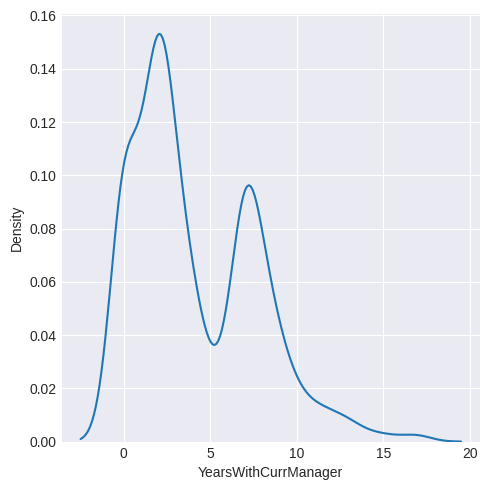

In [ ]:
sns.displot(kind = 'kde', data = df, x = 'YearsWithCurrManager')
plt.show()

In [ ]:
df['YearsWithCurrManager'].skew()

0.8278816692531521

In [ ]:
# Define: Since, the percentage of missing value is less than 5% and the data is skewed. So we replace missing value with Median.

# Code:
df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median(), inplace = True)

# Test:
df['YearsWithCurrManager'].isnull().sum()

0

### 2. Handling Duplicate rows

In [ ]:
# Define: Drop the duplicate rows

# Code:
df.drop_duplicates(inplace = True)

# Test:
print("Total Duplicate Rows:", df.duplicated().sum())

Total Duplicate Rows: 0


In [ ]:
df.shape

(1473, 24)

### 3. Handling Consistency Issue

In [ ]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

In [ ]:
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1038
Travel_Frequently,278
Non-Travel,150
TravelRarely,7


In [ ]:
# Define: Replace TravelRarely with Travel_Rarely

# Code:
df['BusinessTravel'] = df['BusinessTravel'].str.replace('TravelRarely', 'Travel_Rarely')
df['BusinessTravel'] = df['BusinessTravel'].str.replace('Non-Travel', 'Non_Travel')
# Test:
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1045
Travel_Frequently,278
Non_Travel,150


# Feature Engineering

### Transform the "EnvironmentSatisfaction" column.
Change numerical value to "Good", "Average" & "Poor".

In [ ]:
def do_classify(satisfaction):
    if satisfaction >= 4:
        return 'Good'
    elif satisfaction == 3:
        return 'Average'
    else:
        return 'Poor'

In [ ]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].apply(do_classify)

### Transform the "JobSatisfaction" column.
Change numerical value to "Good", "Average" & "Poor".

In [ ]:
df['JobSatisfaction'] = df['JobSatisfaction'].apply(do_classify)

### Transform the "PerformanceRating" column.
Change numerical value to "Good", "Average" & "Poor".

In [ ]:
df['PerformanceRating'] = df['PerformanceRating'].apply(do_classify)

# Download

In [ ]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,Over18,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,Research & Development,3,Life Sciences,Average,Male,1,Laboratory Technician,Average,Single,1420,Y,No,13,Average,0,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,Sales,10,Medical,Good,Female,1,Sales Representative,Average,Single,1200,Y,No,12,Average,0,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,Sales,5,Marketing,Poor,Male,1,Sales Representative,Poor,Single,1878,Y,Yes,14,Average,0,0,0,0,0.0
3,RM728,18,18-25,No,Non_Travel,Research & Development,5,Life Sciences,Poor,Male,1,Research Scientist,Good,Single,1051,Y,No,15,Average,0,0,0,0,0.0
4,RM829,18,18-25,Yes,Non_Travel,Research & Development,8,Medical,Average,Male,1,Laboratory Technician,Average,Single,1904,Y,No,12,Average,0,0,0,0,0.0


In [ ]:
df.shape

(1473, 24)

In [ ]:
df.to_csv('HR_Data.csv', index = False)